In [11]:
from google.colab import drive
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import pandas as pd

In [0]:
df=pd.read_excel("/content/drive/My Drive/clothingreviews.xlsx")

In [14]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [15]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [16]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [0]:
df.drop(["Unnamed: 0","Title"],axis=1,inplace=True)

In [18]:
df.columns

Index(['Clothing ID', 'Age', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

In [19]:
df.isnull().sum()

Clothing ID                  0
Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64

In [0]:
import seaborn as sms
from matplotlib import pyplot as plt

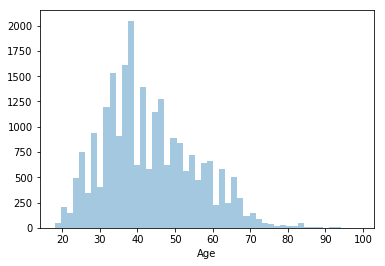

In [21]:
sms.distplot(df["Age"],kde=False)

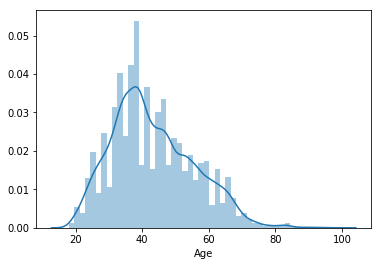

In [22]:
sms.distplot(df["Age"],kde=True)

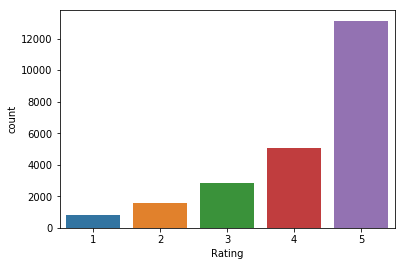

In [23]:
sms.countplot(df["Rating"])

In [24]:
df["Rating"].mean()

4.196031678446734

In [25]:
df.shape

(23486, 9)

In [0]:
df["Division Name"]=df["Division Name"].fillna(df["Division Name"].value_counts().index[0])

In [0]:
df["Department Name"]=df["Department Name"].fillna(df["Department Name"].value_counts().index[0])

In [0]:
df["Class Name"]=df["Class Name"].fillna(df["Class Name"].value_counts().index[0])

In [29]:
df.isnull().sum()

Clothing ID                  0
Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name                0
Department Name              0
Class Name                   0
dtype: int64

In [30]:
df["Division Name"].value_counts()

General           13864
General Petite     8120
Initmates          1502
Name: Division Name, dtype: int64

In [31]:
df["Class Name"].value_counts()

Dresses           6333
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64

In [32]:
df["Department Name"].value_counts()

Tops        10482
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: Department Name, dtype: int64

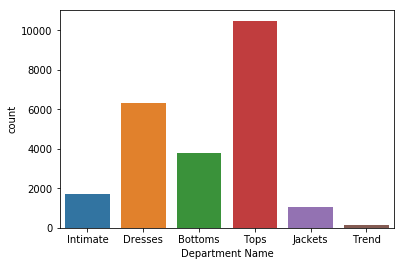

In [33]:
sms.countplot(df["Department Name"])

In [0]:
df=df[-df["Review Text"].isnull()]

In [35]:
df["Review Text"].isnull().sum()

0

In [36]:
df.shape

(22641, 9)

In [0]:
from textblob import TextBlob

In [0]:
df["score"]=df["Review Text"].map(lambda x:TextBlob(x).sentiment.polarity)

In [40]:
df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,score
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891
